In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [13]:
CE3R = pd.read_csv('./magazine/final/CE3R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [14]:
CE3R['ADFN_2'] = CE3R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [15]:
CE3R['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1      [재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,...
2      [격자, 무늬, 트렌치코트, 백, 와이드, 팬츠, 지방시, 밤색, 터틀넥, 르, 안...
3      [다정, 다감한, 성격, ENFJ, 주변, 많아요, 모임, 좋아하는, 사회, 운동,...
4      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
                             ...                        
390    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
391    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
392    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
393    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
394    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 395, dtype: object

In [92]:
CE4R = pd.read_csv('./magazine/final/CE4R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [93]:
CE4R['ADFN_2'] = CE4R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [94]:
CE4R['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1      [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
2      [민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL...
3      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
4      [화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ...
                             ...                        
326    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
327    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
328    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
329    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
330    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 331, dtype: object

### top50 리스트 생성

In [95]:
top500 = pd.read_csv('./CE4R_top500.csv', sep='|', encoding = 'utf-8')

In [96]:
top500

,word,count
0,로제,9163
1,예쁘다,1383
2,귀엽다,1027
3,노래,697
4,사랑,679
...,...,...
495,c,24
496,세대,24
497,안정,24
498,나라,24


In [97]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람']


In [98]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람', '스타일', 'SLIMANE', 'HEDI', '최고', '여신', '컬러', '영어', '공주', '창법', '디자이너', '입덕', 'love', '춤선', '분위기', '몸매', '가수', '시즌', '시작', '드레스', '한국']


### top100

In [99]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람', '스타일', 'SLIMANE', 'HEDI', '최고', '여신', '컬러', '영어', '공주', '창법', '디자이너', '입덕', 'love', '춤선', '분위기', '몸매', '가수', '시즌', '시작', '드레스', '한국', '남성', '스타', '여성', '룩', '영국', '쇼', '대박', '실력', '찰떡', '블랙', '새로운', '지난', '발음', '팬츠', '모델', '짱', '명품', '봄', '라이브', 'PHOEBE', 'PHILO', '애교', '디렉터', '파리', '재킷', 'SAINT', '소리', '멋있다', '보컬', '백', 'BLINK', '핑크', '헤어', '인간', '미모', '천사', '허리', '요정', '디자인', '세계', '신', '표정', '심장', '옷', '크리에이티브', '왕', '포인트', '코트', '스커트', 'CHANEL']


In [100]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람', '스타일', 'SLIMANE', 'HEDI', '최고', '여신', '컬러', '영어', '공주', '창법', '디자이너', '입덕', 'love', '춤선', '분위기', '몸매', '가수', '시즌', '시작', '드레스', '한국', '남성', '스타', '여성', '룩', '영국', '쇼', '대박', '실력', '찰떡', '블랙', '새로운', '지난', '발음', '팬츠', '모델', '짱', '명품', '봄', '라이브', 'PHOEBE', 'PHILO', '애교', '디렉터', '파리', '재킷', 'SAINT', '소리', '멋있다', '보컬', '백', 'BLINK', '핑크', '헤어', '인간', '미모', '천사', '허리', '요정', '디자인', '세계', '신', '표정', '심장', '옷', '크리에이티브', '왕', '포인트', '코트', '스커트', 'CHANEL', '다리', '이미지', '사기', '인기', '사랑스럽다', 'DIOR', '원', '라인', '셔츠', '시대', '고급', '하이', '매장', '힘', '노력', '리본', '독보', '최애', '누나', '말투', '활동', '특유', '걸그룹', '애기', '한국인', '소름', '존재', '버버리', '한국어', '톱', '화이트', '런웨이', '버전', '패턴', '아이템', '완성', 'If', '커버', 'ANGEL', 'GLOBAL', 'HUMAN', 'MISSSAINTLAURENT', '코디', '없음', '눈치', '대', '톤', '감', '기분', '끝', '보기', '관심', 

In [101]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람', '스타일', 'SLIMANE', 'HEDI', '최고', '여신', '컬러', '영어', '공주', '창법', '디자이너', '입덕', 'love', '춤선', '분위기', '몸매', '가수', '시즌', '시작', '드레스', '한국', '남성', '스타', '여성', '룩', '영국', '쇼', '대박', '실력', '찰떡', '블랙', '새로운', '지난', '발음', '팬츠', '모델', '짱', '명품', '봄', '라이브', 'PHOEBE', 'PHILO', '애교', '디렉터', '파리', '재킷', 'SAINT', '소리', '멋있다', '보컬', '백', 'BLINK', '핑크', '헤어', '인간', '미모', '천사', '허리', '요정', '디자인', '세계', '신', '표정', '심장', '옷', '크리에이티브', '왕', '포인트', '코트', '스커트', 'CHANEL', '다리', '이미지', '사기', '인기', '사랑스럽다', 'DIOR', '원', '라인', '셔츠', '시대', '고급', '하이', '매장', '힘', '노력', '리본', '독보', '최애', '누나', '말투', '활동', '특유', '걸그룹', '애기', '한국인', '소름', '존재', '버버리', '한국어', '톱', '화이트', '런웨이', '버전', '패턴', '아이템', '완성', 'If', '커버', 'ANGEL', 'GLOBAL', 'HUMAN', 'MISSSAINTLAURENT', '코디', '없음', '눈치', '대', '톤', '감', '기분', '끝', '보기', '관심', 

In [102]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', '음색', 'CELINE', '솔로', '챙', '음악', '무대', 'BEST', '매력', '춤', '머리', '느낌', '패션', '레전드', '아이돌', '브랜드', '금발', '직캠', '코첼라', '처음', 'LAURENT', '머리카락', '여자', '컬렉션', '바람', '스타일', 'SLIMANE', 'HEDI', '최고', '여신', '컬러', '영어', '공주', '창법', '디자이너', '입덕', 'love', '춤선', '분위기', '몸매', '가수', '시즌', '시작', '드레스', '한국', '남성', '스타', '여성', '룩', '영국', '쇼', '대박', '실력', '찰떡', '블랙', '새로운', '지난', '발음', '팬츠', '모델', '짱', '명품', '봄', '라이브', 'PHOEBE', 'PHILO', '애교', '디렉터', '파리', '재킷', 'SAINT', '소리', '멋있다', '보컬', '백', 'BLINK', '핑크', '헤어', '인간', '미모', '천사', '허리', '요정', '디자인', '세계', '신']


### top50만 남기기

In [103]:
len(CE4R)

331

In [104]:
top30_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [105]:
top50_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [106]:
top100_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [107]:
top200_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [108]:
top300_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [109]:
top500_word = []
for i in range(len(CE4R)):
    w=[]
    for word in CE4R.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [110]:
CE4R

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
2,A,Ce,하나만 걸쳐도 남달라! 후디 입는 법 12,"민트색 후드 톱은 가격미정, 크롬하츠(CHROME HEARTS). 안경은 52만원,...","['민트', '색', '후드', '톱', '크롬', '하츠', 'Chrome', '...","[민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL..."
3,A,Ce,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,"빈티지한 체크무늬 재킷은 가격미정, CELINE(CELINE). 비비드한 핑크 컬러...","['빈티', '한', '체크', '무늬', '재킷', 'CELINE', 'CELIN...","[빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ..."
4,A,Ce,"웃음 뒤의 웃음, 남윤수","화이트 슬리브리스, 스트라이프 오버올 팬츠는 모두 CELINE(CELINE)., 화...","['화이트', '슬리브', '리스', '스트라이프', '오버', '팬츠', 'CEL...","[화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ..."
...,...,...,...,...,...,...
326,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","[말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,..."
327,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱..."
328,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","[로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,..."
329,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","[영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s..."


### item 남기기

In [23]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [24]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [25]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [26]:
# len(top100_not_item_word)

In [27]:
# top100_not_item_word[1]

In [81]:
top50_word

[['컬러', 'CELINE', 'CELINE', 'CELINE'],
 ['CELINE', 'CELINE'],
 ['CELINE', 'CELINE', 'CELINE', '컬러', '컬러'],
 ['CELINE', 'CELINE', '컬러'],
 ['CELINE', 'CELINE', 'CELINE'],
 ['시즌', '스타일', 'LAURENT', 'CELINE', '컬렉션', '컬러', '컬러', 'CELINE', 'CELINE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['시즌',
  '시즌',
  '패션',
  '스타일',
  '드레스',
  '시작',
  '컬렉션',
  'CELINE',
  '패션',
  '스타일',
  '컬러',
  '패션',
  'HEDI',
  'SLIMANE',
  'CELINE'],
 ['CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  '컬러',
  'CELINE',
  'HEDI',
  'SLIMANE',
  '스타일',
  '컬러',
  '느낌',
  'CELINE',
  '패션',
  'CELINE',
  'HEDI',
  'SLIMANE'],
 ['드레스',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',
  'HEDI',
  'SLIMANE',
  '컬러'],
 ['컬러',
  'LAURENT',
  'LAURENT',
  'CELINE',
  'HEDI',
  'SLIMANE',
  'CELINE',

In [82]:
len(top50_word)

331

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [111]:
# 어프라이어리(Apriori)
from apyori import apriori

In [112]:
top30_word[0]

['CELINE', 'CELINE', 'CELINE']

In [121]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.06))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
669,"(로제, 사랑)",0.175227,"[((), (로제, 사랑), 0.17522658610271905, 1.0), ((로...",2
317,"(컬렉션, CELINE)",0.172205,"[((), (컬렉션, CELINE), 0.17220543806646527, 1.0)...",2
321,"(패션, CELINE)",0.172205,"[((), (패션, CELINE), 0.17220543806646527, 1.0),...",2
690,"(로제, 음악)",0.166163,"[((), (로제, 음악), 0.1661631419939577, 1.0), ((로제...",2
652,"(로제, 매력)",0.166163,"[((), (로제, 매력), 0.1661631419939577, 1.0), ((로제...",2
488,"(노래, 로제)",0.163142,"[((), (노래, 로제), 0.16314199395770393, 1.0), ((노...",2
295,"(브랜드, CELINE)",0.160121,"[((), (브랜드, CELINE), 0.16012084592145015, 1.0)...",2
282,"(디자이너, CELINE)",0.154079,"[((), (디자이너, CELINE), 0.1540785498489426, 1.0)...",2
687,"(로제, 예쁘다)",0.148036,"[((), (로제, 예쁘다), 0.14803625377643503, 1.0), ((...",2
657,"(로제, 목소리)",0.148036,"[((), (로제, 목소리), 0.14803625377643503, 1.0), ((...",2


In [122]:
for item in df['items']:
    if '로제' in item:
        print(item)

frozenset({'로제', '사랑'})
frozenset({'로제', '음악'})
frozenset({'로제', '매력'})
frozenset({'노래', '로제'})
frozenset({'로제', '예쁘다'})
frozenset({'로제', '목소리'})
frozenset({'로제', '무대'})
frozenset({'로제', '챙'})
frozenset({'로제', '느낌'})
frozenset({'로제', '귀엽다'})
frozenset({'로제', '분위기'})
frozenset({'로제', '음색'})
frozenset({'로제', '아이돌'})
frozenset({'LAURENT', '로제'})
frozenset({'로제', '한국'})
frozenset({'로제', '최고'})
frozenset({'로제', '가수'})
frozenset({'로제', '처음'})
frozenset({'로제', '스타일'})
frozenset({'로제', '머리'})
frozenset({'로제', '춤'})
frozenset({'로제', '솔로'})
frozenset({'로제', 'BLINK'})
frozenset({'여자', '로제'})
frozenset({'로제', '레전드'})
frozenset({'로제', '스타'})
frozenset({'로제', '천사'})
frozenset({'로제', '걸그룹'})
frozenset({'로제', '영어'})
frozenset({'로제', '시작'})
frozenset({'로제', '짱'})
frozenset({'보컬', '로제'})
frozenset({'로제', '여신'})
frozenset({'로제', '소리'})
frozenset({'로제', '표정'})
frozenset({'로제', '금발'})
frozenset({'로제', '공주'})
frozenset({'로제', '최애'})
frozenset({'로제', '대박'})
frozenset({'로제', '패션'})
frozenset({'로제', '찰떡'})
fro

In [123]:
df[df['items'] == {'로제'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [124]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [125]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [126]:
pos = nx.spring_layout(G)

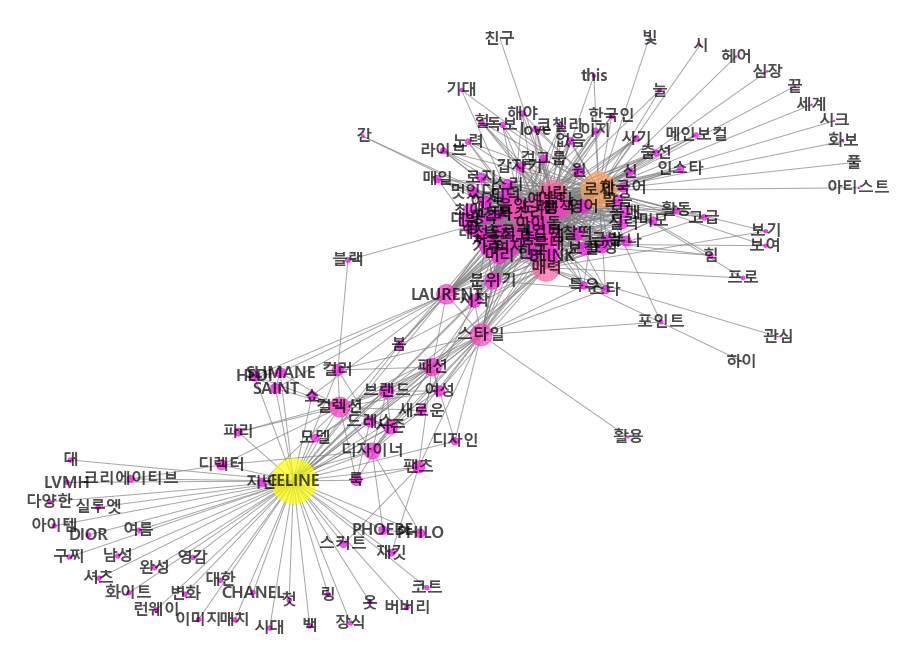

In [127]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring,
                font_color = 'black', font_weight = 'bold')

plt.savefig('./nt_CE4R_top500_mis06-b.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']